In [1]:
%load_ext kedro

[10/06/25 13:54:38] INFO     Using                                                                  ]8;id=337374;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=584264;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-                
                             packages/kedro/framework/project/rich_logging.yml' as logging                         
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=801529;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=562076;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=974155;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=156733;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=545868;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=532747;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/zishan/Documents/projects/car-price-prediction.                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/06/25 13:54:38] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=504661;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=38242;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/06/25 13:54:40] INFO     Kedro project car_price_prediction                                     ]8;id=313752;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=247402;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=788095;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=634948;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

In [2]:
df = catalog.load('feature_data')
df.info()

[10/06/25 13:54:54] INFO     Loading data from feature_data (ParquetDataset)...                ]8;id=955962;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=144886;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   model_year                 188533 non-null  int64  
 1   milage                     188533 non-null  int64  
 2   fuel_type                  188533 non-null  object 
 3   accident                   188533 non-null  bool   
 4   clean_title                188533 non-null  bool   
 5   price                      188533 non-null  int64  
 6   premium_score              188531 non-null  float64
 7   eng_cylinders              173347 non-null  float64
 8   eng_volume                 181835 non-null  float64
 9   eng_hp                     155274 non-null  float64
 10  eng_class                  188533 non-null  object 
 11  trans_tech                 188533 non-null  object 
 12  trans_gear_count_category  188533 non-null  object 
 13  trans_mordernity           18

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

def _null_percentage(x: pd.Series) -> float:
    return int(x.isna().sum() / len(x))

impute_median_cols = [col for col in num_cols if _null_percentage(df[col]) < 0.05]
impute_knn_cols = [col for col in num_cols if _null_percentage(df[col]) > 0.05]

median_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

knn_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

onehot_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num_median', median_pipe, impute_median_cols),
    ('num_knn', knn_pipe, impute_knn_cols),
    ('cat', onehot_pipe, cat_cols),
])


In [6]:
from sklearn.feature_selection import VarianceThreshold

In [7]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

var_thresh = VarianceThreshold(threshold=0)
var_thresh.fit(df[num_cols])

print(var_thresh.get_support())

[ True  True  True  True  True  True  True  True  True  True  True]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

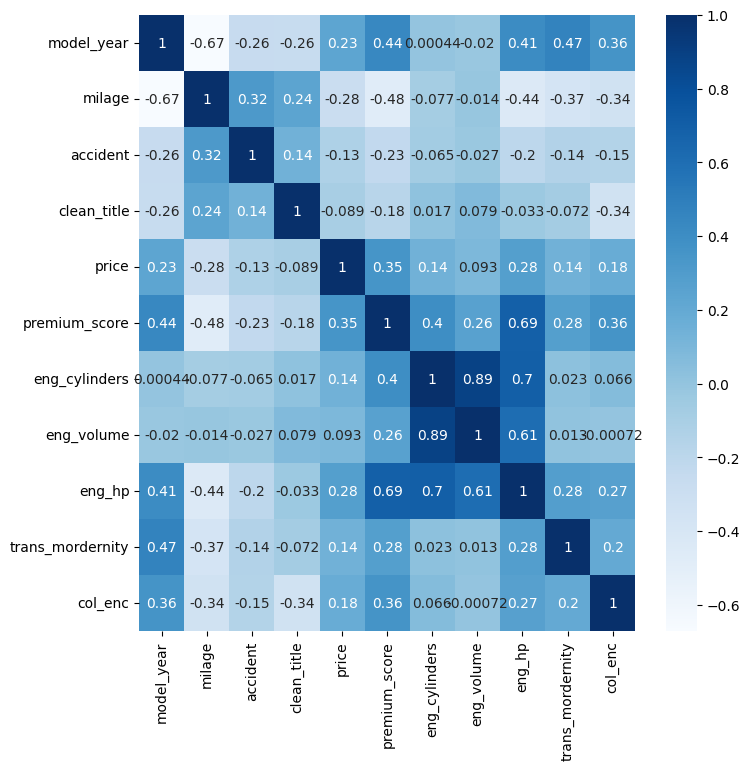

In [9]:
cor = df[num_cols].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [10]:
def correlation(df: pd.DataFrame, thres: int) -> list:
    cor_cols = set()
    cor_mat = df.corr()
    num_cols = len(cor_mat.columns)
    for i in range(num_cols):
        for j in range(i):
            if cor_mat.iloc[i, j] > thres:
                col_a, col_b = df.columns[i], df.columns[j]
                if df[col_a].isna().sum() > df[col_b].isna().sum():
                    cor_cols.add(col_a)
                else:
                    cor_cols.add(col_b)
    return list(cor_cols)

In [11]:
correlated_columns = correlation(df[num_cols], 0.85)
for col in correlated_columns:
    print(col)

eng_cylinders


In [12]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [13]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
num_df = X_train[num_cols]
num_df = num_df.fillna(num_df.median())

mutual_info = pd.Series(mutual_info_regression(num_df, y_train))
mutual_info.index = num_df.columns
mutual_info.sort_values(ascending=False)


milage              0.644310
model_year          0.542541
eng_hp              0.531607
premium_score       0.421875
col_enc             0.224743
eng_volume          0.169963
clean_title         0.161108
trans_mordernity    0.151565
eng_cylinders       0.062718
accident            0.061230
dtype: float64

<Axes: >

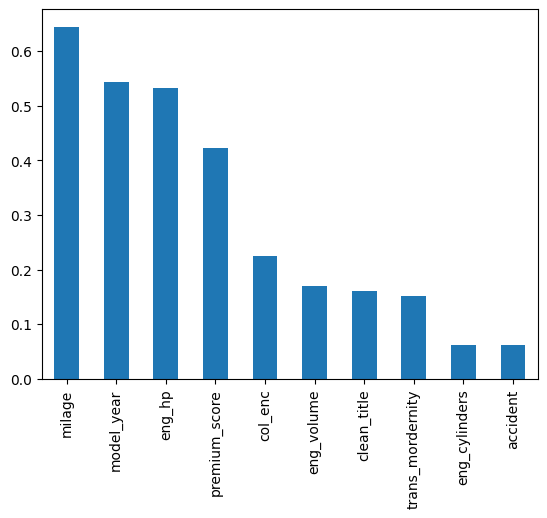

In [15]:
mutual_info.sort_values(ascending=False).plot.bar()

In [16]:
sel_5_best = SelectKBest(mutual_info_regression, k=5)
sel_5_best.fit(num_df, y_train)
sel_5_best.get_support()


array([ True,  True, False, False,  True, False, False,  True, False,
        True])

In [17]:
top_5_cols = [col for col in num_df.columns if col in num_df.columns[sel_5_best.get_support()]]
top_5_cols

['model_year', 'milage', 'premium_score', 'eng_hp', 'col_enc']

In [18]:
from sklearn.feature_selection import chi2

In [19]:
cat_cols = ['fuel_type', 'eng_class', 'trans_tech', 'trans_gear_count_category']
cat_df = X_train[cat_cols]

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
cat_df_imputed = cat_df.copy()

# Step 1: Set fuel_type for electric/hybrid vehicles (business logic)
electric_mask = cat_df_imputed['eng_class'].str.contains('Electric|Hybrid', na=False)
cat_df_imputed.loc[electric_mask, 'fuel_type'] = 'Electric'

# Step 2: For the remaining missing (non-electric vehicles), use most frequent
remaining_na = cat_df_imputed['fuel_type'].isna()
if remaining_na.any():
    # Get the most frequent fuel type from NON-MISSING, NON-ELECTRIC vehicles
    non_electric_non_na = (~electric_mask) & (cat_df_imputed['fuel_type'].notna())
    most_frequent_fuel = cat_df_imputed.loc[non_electric_non_na, 'fuel_type'].mode()
    
    if not most_frequent_fuel.empty:
        cat_df_imputed.loc[remaining_na, 'fuel_type'] = most_frequent_fuel[0]
    else:
        # Fallback if no non-electric, non-NA values exist
        cat_df_imputed.loc[remaining_na, 'fuel_type'] = 'Gasoline'  # Most common default
print(f"Remaining missing after smart imputation: {cat_df_imputed['fuel_type'].isna().sum()}")

Remaining missing after smart imputation: 0


In [22]:
cat_df_encoded = pd.get_dummies(cat_df_imputed)

In [23]:
len(cat_df_encoded.columns)

30